# Introduction

Just a short data cleaning walthrough, based on data collected by the team over at [FiveThirtyEight](http://fivethirtyeight.com/) regarding public opinion on the best Star Wars film. The data was originally collected by a survey. This is a good dataset to work with for data cleaning practice, as multiple answers were allowed for some of the questions. I found this scenario over at dataquest.io, so thanks to them. I'm following their data scientist pathway and having a lot of fun learning python!

The data has several columns, including the following:

- `RespondentID` — An anonymized ID for the respondent (person taking the survey)
- `Gender` — the respondent's gender
- `Age` — the respondent's age
- `Household Income` — the respondent's income
- `Education` — the respondent's education level
- `Location (Census Region)` — the respondent's location
- `Have you seen any of the 6 films in the Star Wars franchise?` — a Yes or No response
- `Do you consider yourself to be a fan of the Star Wars film franchise?` — a Yes or No response

**Questions**

1. Do respondents prefer the sequels or prequels more?
2. From our respondents, is there a demographic that prefers the sequels or prequels more?
3. How do characters from the franchise rank in terms of favourability?


# Read, import and explore data

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

#encoding specified as dataset has some chars not in Python's default encoding
star_wars = pd.read_csv("../input/star-wars-survey-data/star_wars.csv", encoding="ISO-8859-1")

In [2]:
#quick dive into the first 10 values, looking for any unusual entries
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [3]:
#review of the column names
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

### Observations - columns and entries

**Problem 1**

The columns `Have you seen any of the 6 films in the Star Wars franchise?` and `Do you consider yourself to be a fan of the Star Wars film franchise?` both have Yes/No answers, or NaN (which i'll assume means they did not answer).
- these columns, entries currently are strings, will need to be converted to allow for analysis

**Problem 2**

The answers to the column `Which of the following Star Wars films have you seen? Please select all that apply.` are represented by the following 5 columns:


- *(original question)* `Which of the following Star Wars films have you seen? Please select all that apply.` — whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
- `Unnamed: 4` — whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
- `Unnamed: 5` — whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
- `Unnamed: 6` — whether or not the respondent saw Star Wars: Episode IV A New Hope.
- `Unnamed: 7` — whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
- `Unnamed: 8` — whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

The answer = true if the value is the name of the movie. If it is NaN, it means the respondent either didn't answer the question or didn't see the movie. 
- again, will need to convert answer to a more appropriate data type (Bool)
- rename columns to something more intuitive

**Problem 3**

for the next set of columns the movies are ranked from 1 to 6, with `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.` being how much they liked the first episode, `Unnamed: 10` the second episode, and so on until `Unnamed: 14`, which is episode VI.
- as the answers are already numerical, the data does not need a lot of cleaning, just re-assigning to an appropriate data type
- then renaming the columns

# Data cleaning - converting column entries to appropriate data types

### Problem 1

In [4]:
#dict to define mapping
yes_no = {
    "Yes": True,
    "No": False
}

#map each yes/no str value to boolean equivalent
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

In [5]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [6]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

### Problem 2

In [7]:
#similar approach, but map name of movie to True, and NaN to False
sw_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

In [8]:
for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(sw_mapping)

In [9]:
#rename columns
sw_names = {
    "Which of the following Star Wars films have you seen? Please select all that apply.":  "seen, episode 1",
    "Unnamed: 4": "seen, episode 2",
    "Unnamed: 5": "seen, episode 3",
    "Unnamed: 6": "seen, episode 4",
    "Unnamed: 7": "seen, episode 5",
    "Unnamed: 8": "seen, episode 6"
}


star_wars = star_wars.rename(sw_names, axis=1)

In [10]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,"seen, episode 1","seen, episode 2","seen, episode 3","seen, episode 4","seen, episode 5","seen, episode 6",Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,NaN,NaN,True,True,True,True,True,True,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### Problem 3

In [11]:
#previously, NaN was preventing me from converting the float so had to remove
star_wars.drop(star_wars.index[star_wars['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.'] == 'Star Wars: Episode I  The Phantom Menace'], inplace=True)

In [12]:
#converting column entries to  float

star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [13]:
#renaming ranking columns
sw_ranks = {
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.":  "rank, episode 1",
    "Unnamed: 10": "rank, episode 2",
    "Unnamed: 11": "rank, episode 3",
    "Unnamed: 12": "rank, episode 4",
    "Unnamed: 13": "rank, episode 5",
    "Unnamed: 14": "rank, episode 6"
}

star_wars = star_wars.rename(sw_ranks, axis=1)

In [14]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen, episode 1', 'seen, episode 2', 'seen, episode 3',
       'seen, episode 4', 'seen, episode 5', 'seen, episode 6',
       'rank, episode 1', 'rank, episode 2', 'rank, episode 3',
       'rank, episode 4', 'rank, episode 5', 'rank, episode 6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do you consider yourself to be a fan of the Star Trek f

# Data analysis - highest-ranked movie

In [15]:
#first calculate means for all columns
means = star_wars.mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


<AxesSubplot:title={'center':'Each episode, ranked. A lower ranking is better!!'}>

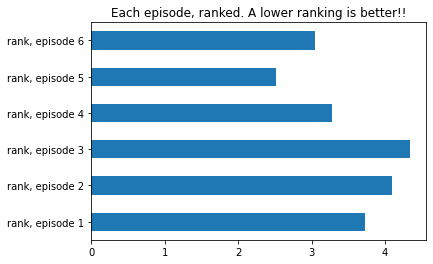

In [16]:
#then filter to only means for the ranking columns
rank_means = means[9:15].astype(float)
plt.title('Each episode, ranked. A lower ranking is better!!')

rank_means.plot.barh()

### Observations - average movie rankings
Episode 5 was the highest ranked movie, followed by episode 6, then 4. 
- these relate to the original trilogy of movies, released in order of 4, 5 and 6
- these match expectations; common opinion is that the original trilogy was better!

# Data analysis - how many people viewed each movie
As I cleaned the 'seen' columns, I can use .sum() to treat the boolean values as integers (True = 1, False = 0). Therefore, calculating the total number of views can be done by taking the sum of each 'seen' column.

In [17]:
totals = star_wars.sum()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

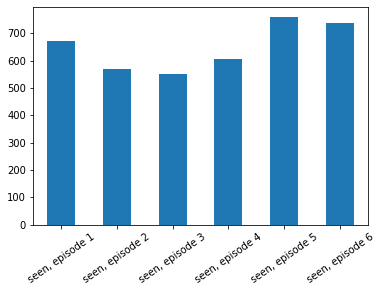

In [18]:
seen_totals = totals[3:9].astype(float)
seen_totals.plot.bar(rot=35)

### Observations - total views for each movie
More respondents have seen the original trilogy than the prequels. They also ranked these movies higher, suggesting a link. Episode 1 was also seen by more respondents than episode 4, and although it wasn't ranked higher than episode 4 - it was the highest ranked prequel movie. 

# Data analysis - demographic preference (gender)

In [19]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

males_means = males.mean()
females_means = females.mean()

male_totals = males.sum()
female_totals = females.sum()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Dropping of nuisance columns

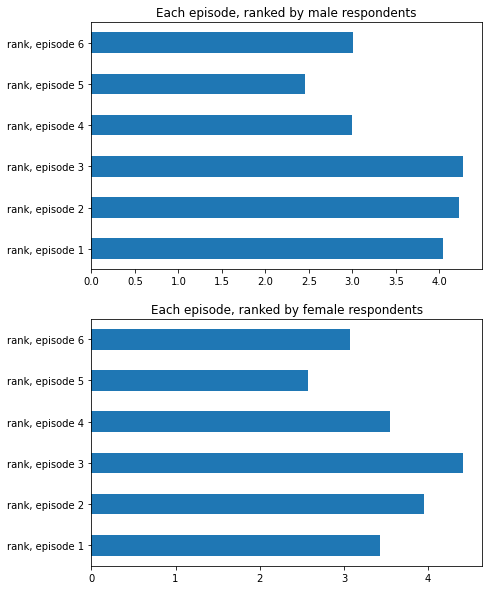

In [20]:
male_rank_means = males_means[9:15].astype(float)
female_rank_means = females_means[9:15].astype(float)

plt.figure(figsize=(7, 10))
plt.subplot(2, 1, 1)
male_rank_means.plot.barh()
plt.title('Each episode, ranked by male respondents')

plt.subplot(2, 1, 2)

female_rank_means.plot.barh()
plt.title('Each episode, ranked by female respondents')

plt.show()

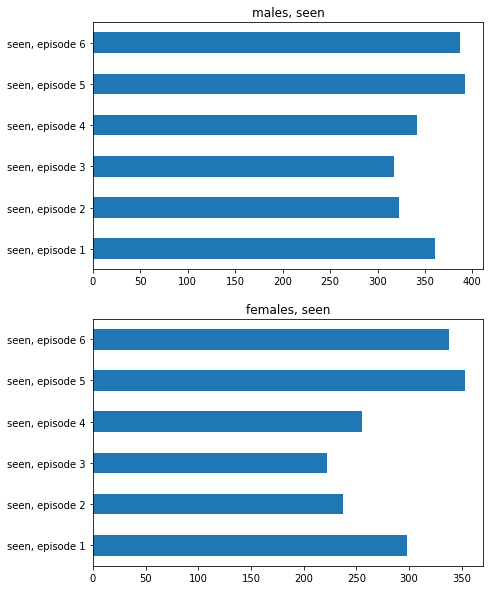

In [21]:
male_seen_totals = male_totals[3:9].astype(float)
female_seen_totals = female_totals[3:9].astype(float)


plt.figure(figsize=(7, 10))
plt.subplot(2, 1, 1)
male_seen_totals.plot.barh()
plt.title('males, seen')

plt.subplot(2, 1, 2)
female_seen_totals.plot.barh()
plt.title('females, seen')
plt.show()

### Observations

**Ranking**

In male respondents, rankings are very clear in favour of the original trilogy movies. For the female respondents, episode 1 was actually ranked higher than episode 4 and the difference in rankings between the rest of the original trilogy vs sequels is not as large as it is in male respondents.

**Which movies have the respondents seen**

For males, more respondents have seen episode 6, 5 and 1 than any other movie. For female respondents, the difference is greater; more have seen the original movies (5 and 6) and then episode 1. 
- more males have seen all movies than females, where they have mostly seen 5, 6 and 1
- despite that more males have watched 1-3 than females, they liked them less than females


# Data analysis - demographic preference (fans vs non fans)

In [22]:
fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True]
not_fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False]

In [23]:
fans_means = fans.mean()
not_fans_means = not_fans.mean()

fans_totals = fans.sum()
not_fans_totals = not_fans.sum()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWar

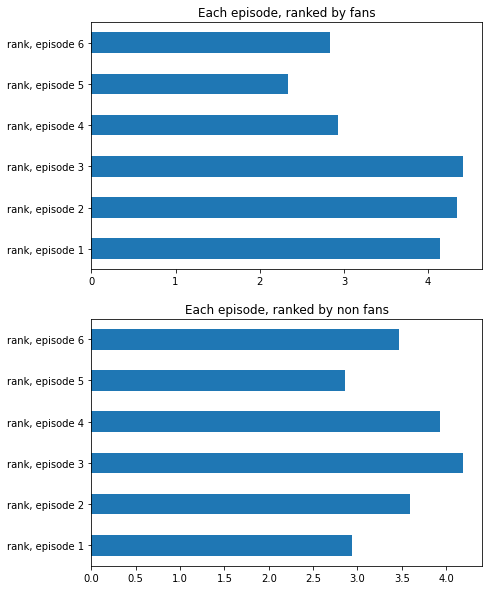

In [24]:
fans_rank_means = fans_means[9:15].astype(float)
not_fans_rank_means = not_fans_means[9:15].astype(float)

plt.figure(figsize=(7, 10))
plt.subplot(2, 1, 1)
fans_rank_means.plot.barh()
plt.title('Each episode, ranked by fans')

plt.subplot(2, 1, 2)

not_fans_rank_means.plot.barh()
plt.title('Each episode, ranked by non fans')

plt.show()

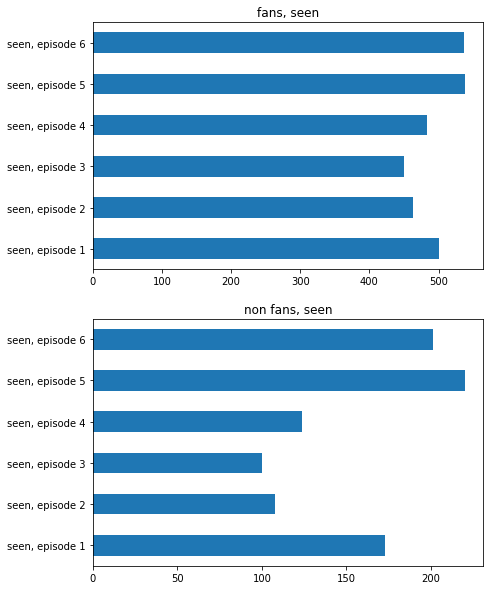

In [25]:
fans_seen_totals = fans_totals[3:9].astype(float)
not_fans_seen_totals = not_fans_totals[3:9].astype(float)


plt.figure(figsize=(7, 10))
plt.subplot(2, 1, 1)
fans_seen_totals.plot.barh()
plt.title('fans, seen')

plt.subplot(2, 1, 2)
not_fans_seen_totals.plot.barh()
plt.title('non fans, seen')
plt.show()

In [26]:
#how many fans vs non fans are male/female
print(fans['Gender'].value_counts())
print('\n')
print(not_fans['Gender'].value_counts())

Male      303
Female    238
Name: Gender, dtype: int64


Female    159
Male      120
Name: Gender, dtype: int64


### Observations - fans vs non fans

**Ranking**

Fans ranked the movies strictly in favour of the original trilogy - as seen in the male respondents. More male respondents also identified as a fan of the franchise. There is a wider spread of opinion amongst non fans, however it is still in favour of the original triology, apart from episode 1 which ranks second highest.

**Which movies have the respondents seen**

As expected, those that identified as fans have seen almost all of the movies. Non fans have mostly seen episode 6, 5 and episode 1. The bar chart is very similar to the female respondents; there were also more females that identified as non fans.

# Data analysis - demographic preference (Education)

I'll sort by education and see if I can find any interesting patterns here.

In [27]:
star_wars['Education'].value_counts()

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

In [28]:
bachelor = star_wars[star_wars['Education'] == 'Bachelor degree']
graduate = star_wars[star_wars['Education'] == 'Graduate degree']
high_school_only = star_wars[star_wars['Education'] == 'High school degree']
some = star_wars[star_wars['Education'] == 'Some college or Associate degree']

In [29]:
#calculating percentage of fans by education

bachelor['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()
bachelor_pct = 172/ (172+90) * 100

graduate['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()
graduate_pct = 152/ (152+74) * 100

high_school_only['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()
high_school_only_pct = 41/ (41+30) * 100

some['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()
some_pct = 171/(171+83) * 100

In [30]:
some['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

True     171
False     83
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [31]:
print(round(bachelor_pct, 2))
print(round(graduate_pct, 2))
print(round(high_school_only_pct, 2))
print(round(some_pct, 2))

65.65
67.26
57.75
67.32


Text(0.5, 1.0, 'Percentage of respondents identifying as fans of the franchise, by education')

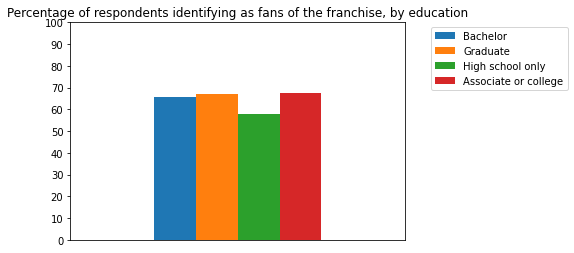

In [32]:
percentage_fans = {'Bachelor': 65.65, 'Graduate': 67.26, 'High school only': 57.75, 'Associate or college': 67.32}
percentage_df = pd.DataFrame(percentage_fans, index=[0])

percentage_df.plot.bar()
plt.legend(bbox_to_anchor=(1, 0, 0.5, 1))
plt.tick_params(axis='x', bottom=False, labelbottom=False)
plt.yticks(ticks=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.title('Percentage of respondents identifying as fans of the franchise, by education')

### Observations
Nothing particularly conclusive from those that responded fan vs non fan, by education.

# Data analysis - favourability of Star Wars characters 

Columns 15 to 29 contain data relating to various iconic characters from the Star Wars franchise and respondents opinions. These columns will require a quick clean before analysis.

1. rename columns to the names of each character
2. determine how each character was scored in terms of favourability
3. make a dataframe containing the counts for each score grading (combining if separated)



**note:** column/character names names were taken from the original readme file

In [33]:
#renaming star wars character columns
star_wars.rename(columns={'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'Luke Skywalker', \
                          'Unnamed: 16': 'Han Solo', \
                          'Unnamed: 17': 'Princess Leia Organa', \
                          'Unnamed: 18': 'Obi Wan Kenobi', \
                          'Unnamed: 19': 'Yoda', \
                          'Unnamed: 20': 'R2-D2', \
                          'Unnamed: 21': 'C-3P0', \
                          'Unnamed: 22': 'Anakin Skywalker', \
                          'Unnamed: 23': 'Darth Vader', \
                          'Unnamed: 24': 'Lando Calrissian', \
                          'Unnamed: 25': 'Padme Amidala', \
                          'Unnamed: 26': 'Boba Fett', \
                          'Unnamed: 27': 'Emperor Palpatine', \
                          'Unnamed: 28': 'Jar Jar Binks'}, inplace=True)

In [34]:
characters = star_wars.iloc[:, 15:29]

In [35]:
characters = characters.dropna()

In [36]:
#determining how the favourability is graded
characters['Luke Skywalker'].value_counts()

Very favorably                                 561
Somewhat favorably                             138
Neither favorably nor unfavorably (neutral)     40
Unfamiliar (N/A)                                14
Somewhat unfavorably                             6
Very unfavorably                                 1
Name: Luke Skywalker, dtype: int64

graded as:

Very favorably                                 
Somewhat favorably                             
Neither favorably nor unfavorably (neutral)     
Somewhat unfavorably                                                           
Very unfavorably 
Unfamiliar (N/A)

In [37]:
#Method - boolean masking to filter dataset based on grading,
#then adding to a pre-initialised dictionary
# convert dictionary to a df and modify as necessary so character names are columns (easier to index)

character_list = ['Luke Skywalker', 'Han Solo', 'Princess Leia Organa', 'Obi Wan Kenobi', 'Yoda', 'R2-D2', 'C-3P0', 'Anakin Skywalker',
                 'Darth Vader','Lando Calrissian', 'Padme Amidala', 'Boba Fett', 'Emperor Palpatine', 'Jar Jar Binks']
favourable_dict = {}
unfavourable_dict = {}
neutral_dict = {}
unfamiliar_dict = {}

for c in character_list:
    favourable_bool = (characters[c] == 'Very favorably') | (characters[c] == 'Somewhat favorably')
    favourable_dict[c] = characters[c][favourable_bool].value_counts()
    
    unfavourable_bool = (characters[c] == 'Neither favorably nor unfavorably (neutral)')
    unfavourable_dict[c] = characters[c][unfavourable_bool].value_counts()
    
    neutral_bool = (characters[c] == 'Very unfavorably') | (characters[c] == 'Somewhat unfavorably')
    neutral_dict[c] = characters[c][neutral_bool].value_counts()
    
    unfamiliar_bool = (characters[c] == 'Unfamiliar (N/A)')
    unfamiliar_dict[c] = characters[c][unfamiliar_bool].value_counts()


In [38]:
#convert into a dataframe
favourable_df = pd.DataFrame.from_dict(favourable_dict, orient='index')
unfavourable_df = pd.DataFrame.from_dict(unfavourable_dict, orient='index')
neutral_df = pd.DataFrame.from_dict(neutral_dict, orient='index')
unfamiliar_df = pd.DataFrame.from_dict(unfamiliar_dict, orient='index')
#favourable_df = favourable_df.T

In [39]:
favourable_df.head()

,Very favorably,Somewhat favorably
Luke Skywalker,561,138
Han Solo,504,201
Princess Leia Organa,505,188
Obi Wan Kenobi,227,254
Yoda,551,146


In [40]:
#combining separate dataframes
combined_favourability = pd.concat([favourable_df, unfavourable_df, neutral_df, unfamiliar_df], axis=1)

In [41]:
#change rows to columns 
#just to have an alternate view with character names as columns
combined_favourability_columns = combined_favourability.T

In [42]:
combined_favourability.head()

,Very favorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Somewhat unfavorably,Very unfavorably,Unfamiliar (N/A)
Luke Skywalker,561,138,40,6,1,14
Han Solo,504,201,36,11,2,6
Princess Leia Organa,505,188,45,11,4,7
Obi Wan Kenobi,227,254,118,79,36,46
Yoda,551,146,40,6,5,12


In [43]:
combined_favourability_columns.head()

,Luke Skywalker,Han Solo,Princess Leia Organa,Obi Wan Kenobi,Yoda,R2-D2,C-3P0,Anakin Skywalker,Darth Vader,Lando Calrissian,Padme Amidala,Boba Fett,Emperor Palpatine,Jar Jar Binks
Very favorably,561,504,505,227,551,106,286,130,133,433,514,101,156,561
Somewhat favorably,138,201,188,254,146,135,162,215,147,212,170,120,172,130
Neither favorably nor unfavorably (neutral),40,36,45,118,40,193,74,219,228,74,54,149,197,48
Somewhat unfavorably,6,11,11,79,6,61,94,57,86,22,10,96,53,7
Very unfavorably,1,2,4,36,5,119,135,8,42,6,4,195,31,6


In [44]:
#checking if values match
star_wars['Jar Jar Binks'].value_counts()

Very favorably                                 605
Somewhat favorably                             144
Neither favorably nor unfavorably (neutral)     51
Unfamiliar (N/A)                                10
Very unfavorably                                 8
Somewhat unfavorably                             8
Name: Jar Jar Binks, dtype: int64

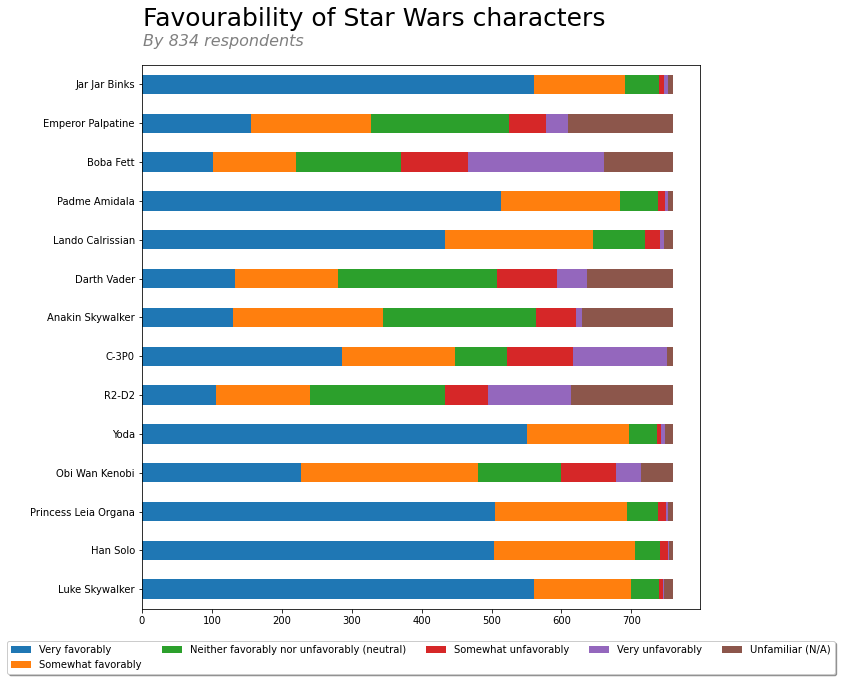

In [45]:
#plotting out favourability as a bar chart
fig = plt.figure()
ax = plt.subplot(111)

combined_favourability.plot(kind='barh', stacked=True, figsize=(10,10), ax=ax)


ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

plt.text(x=1, y=14.5, s='Favourability of Star Wars characters', color='Black', size = 25)
plt.text(x=1, y=14, s='By 834 respondents', color='grey', size = 16, style='italic')

plt.show()

### Observations - favourability
Boba Fett seems to be the most polarising character, according to the survey results! Jar Jar Binks is strangely more popular than I had anticipated...